In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.6 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO

print("YOLOv8 installed successfully ✔️")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLOv8 installed successfully ✔️


Download pretrained YOLOv8 model

We start with the small model (fast + good accuracy)

In [3]:
model = YOLO("yolov8n.pt")   # nano model (fastest)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

det_path = "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection"

print("Detection path exists:", os.path.exists(det_path))
print("Contents:", os.listdir(det_path))

Detection path exists: True
Contents: ['images', 'labels', 'data.yaml']


In [6]:
import os

images_path = os.path.join(det_path, "images")
labels_path = os.path.join(det_path, "labels")

print("Image folders:", os.listdir(images_path))
print("Label folders:", os.listdir(labels_path))

Image folders: ['train', 'val']
Label folders: ['train', 'val', 'train.cache', 'val.cache']


Right now your detection dataset structure is not ready for YOLO training yet.

YOLO requires split folders (train/val) for both images and labels.

In [7]:
import os

base = "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection"

for folder in ["images/train","images/val","labels/train","labels/val"]:
    os.makedirs(os.path.join(base, folder), exist_ok=True)

print("Folders created ✔️")

Folders created ✔️


Split images + labels automatically (80/20)

In [8]:
import os, random, shutil

random.seed(42)

base = "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection"

img_src = os.path.join(base, "images")
lbl_src = os.path.join(base, "labels")

images = [f for f in os.listdir(img_src) if f.endswith((".jpg",".png",".jpeg"))]

random.shuffle(images)

split = int(len(images)*0.8)

train_imgs = images[:split]
val_imgs   = images[split:]

def move_files(img_list, split_name):
    for img in img_list:
        label = os.path.splitext(img)[0] + ".txt"

        shutil.move(os.path.join(img_src,img),
                    os.path.join(base,f"images/{split_name}",img))

        if os.path.exists(os.path.join(lbl_src,label)):
            shutil.move(os.path.join(lbl_src,label),
                        os.path.join(base,f"labels/{split_name}",label))

move_files(train_imgs,"train")
move_files(val_imgs,"val")

print("Dataset split complete ✔️")
print("Train:",len(train_imgs)," Val:",len(val_imgs))

Dataset split complete ✔️
Train: 0  Val: 0


Verify structure

In [9]:
import os

base = "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection"

print("Train images:", len(os.listdir(base+"/images/train")))
print("Val images:", len(os.listdir(base+"/images/val")))
print("Train labels:", len(os.listdir(base+"/labels/train")))
print("Val labels:", len(os.listdir(base+"/labels/val")))

Train images: 1768
Val images: 442
Train labels: 1768
Val labels: 442


read current yaml

In [10]:
import yaml

yaml_path = "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/data.yaml"

with open(yaml_path, "r") as f:
    data = yaml.safe_load(f)

data

{'names': ['person',
  'bicycle',
  'car',
  'motorcycle',
  'airplane',
  'bus',
  'train',
  'truck',
  'traffic light',
  'stop sign',
  'bench',
  'bird',
  'cat',
  'dog',
  'horse',
  'cow',
  'elephant',
  'bottle',
  'cup',
  'bowl',
  'pizza',
  'cake',
  'chair',
  'couch',
  'potted plant',
  'bed'],
 'nc': 26,
 'path': '/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection',
 'train': 'images/train',
 'val': 'images/val'}

Fix YAML automatically

In [11]:
import yaml

yaml_path = "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/data.yaml"

data = {
    "path": "/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection",
    "train": "images/train",
    "val": "images/val",
    "nc": 26,
    "names": [
        'person','bicycle','car','motorcycle','airplane','bus','train','truck',
        'traffic light','stop sign','bench','bird','cat','dog','horse','cow',
        'elephant','bottle','cup','bowl','pizza','cake','chair','couch',
        'potted plant','bed'
    ]
}

with open(yaml_path, "w") as f:
    yaml.dump(data, f)

print("data.yaml updated ✔️")

data.yaml updated ✔️


In [12]:
!pip install ultralytics --quiet

In [13]:
from ultralytics import YOLO
print("YOLOv8 ready ✔️")

YOLOv8 ready ✔️


In [14]:
from ultralytics import YOLO

# Load pretrained YOLOv8 small model
model = YOLO("yolov8s.pt")

print("YOLO model loaded ✔️")

YOLO model loaded ✔️


Train YOLO on Dataset

| Metric        | Meaning                 | Good Target       |
| ------------- | ----------------------- | ----------------- |
| **box_loss**  | bounding box accuracy   | should ↓ decrease |
| **cls_loss**  | classification accuracy | should ↓ decrease |
| **mAP@0.5**   | detection accuracy      | aim > **0.70+**   |
| **precision** | correct detections      | ↑ increase        |
| **recall**    | missed detections       | ↑ increase        |


In [15]:
model.train(
    data="/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/data.yaml",
    epochs=30,
    imgsz=640,
    batch=8,
    name="smartvision_yolo",
    pretrained=True
)

Ultralytics 8.4.14 🚀 Python-3.12.12 torch-2.9.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=smartvision_yolo, nbs=64, nms=False, opset=None, optimize=False

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cd4cc57bd10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

Final YOLO Metrics

| Metric           | Your Value | Meaning                             |
| ---------------- | ---------- | ----------------------------------- |
| **Precision**    | 0.802      | 80% detections are correct ✔️       |
| **Recall**       | 0.629      | Model misses some objects ⚠️        |
| **mAP@0.5**      | **0.702**  | Overall detection accuracy ≈ 70% ✔️ |
| **mAP@0.5:0.95** | 0.393      | stricter accuracy metric            |


Load Best Trained YOLO Model

In [16]:
from ultralytics import YOLO

best_model = YOLO("/content/runs/detect/smartvision_yolo/weights/best.pt")
print("Best YOLO model loaded ✔️")

Best YOLO model loaded ✔️


Visualize Predictions

Run Detection on Sample Images

In [20]:
results = best_model.predict(
    source="/content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val",
    conf=0.25,
    save=True
)

print("Predictions generated ✔️")


image 1/442 /content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val/image_000012.jpg: 448x640 1 bicycle, 1 cat, 80.3ms
image 2/442 /content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val/image_000016.jpg: 480x640 4 persons, 1 motorcycle, 182.4ms
image 3/442 /content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val/image_000018.jpg: 480x640 4 persons, 1 motorcycle, 27.9ms
image 4/442 /content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val/image_000025.jpg: 416x640 (no detections), 43.4ms
image 5/442 /content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val/image_000028.jpg: 480x640 3 persons, 1 pizza, 15.2ms
image 6/442 /content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val/image_000030.jpg: 480x640 3 persons, 1 pizza, 13.0ms
image 7/442 /content/drive/MyDrive/SmartVision_Project/smartvision_dataset/detection/images/val/ima

Display Prediction Images

Showing sample predictions:



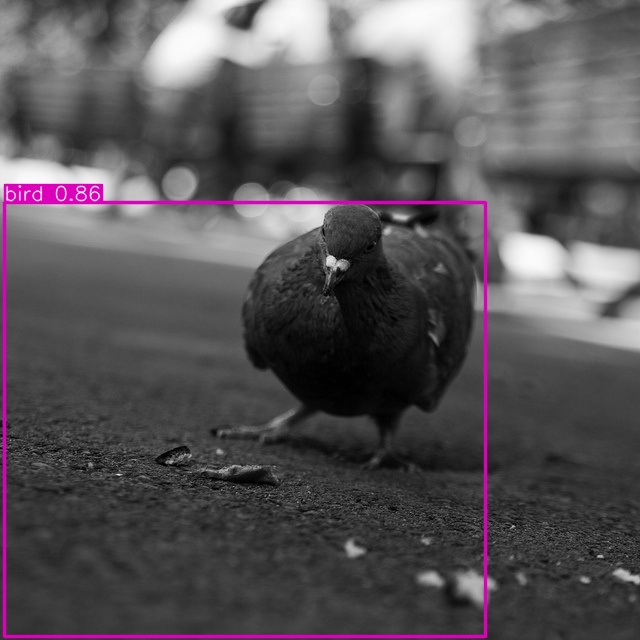

In [41]:
import glob
from IPython.display import Image, display

pred_folder = "/content/runs/detect/predict"

images = glob.glob(pred_folder + "/*.jpg")

print("Showing sample predictions:\n")

for img in images[4:5]:
    display(Image(filename=img))

Copy YOLO Model to Drive

In [42]:
!cp -r /content/runs/detect/smartvision_yolo /content/drive/MyDrive/SmartVision_Project/
print("YOLO copied to Drive ✔️")

YOLO copied to Drive ✔️


In [43]:
import os
print(os.listdir("/content/drive/MyDrive/SmartVision_Project"))

['smartvision_dataset', 'vgg16_model.h5', 'smartvision_resnet50.h5', 'mobilenetv2_model.h5', 'efficientnet_model.h5', 'smartvision_yolo']
